In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from igp2.agents.agentstate import AgentState
from igp2.data.data_loaders import InDDataLoader
from igp2.data.episode import Frame
from igp2.data.scenario import InDScenario, ScenarioConfig
from igp2.opendrive.map import Map
from igp2.opendrive.plot_map import plot_map
from core.feature_extraction import FeatureExtractor, GoalDetector
from core.goal_generator import GoalGenerator
from core import feature_extraction
print(feature_extraction.__file__)

/home/cillian/phd/projects/GRIT/core/feature_extraction.py


In [2]:
odr_results = pd.read_csv('../predictions/heckstrasse_trained_trees_test.csv')
odr_results.shape

(4004, 14)

In [3]:
lanelet_results = pd.read_csv('../../GRIT-lanelet/predictions/heckstrasse_trained_trees_test.csv')
lanelet_results.shape

(3861, 14)

In [4]:
odr_results = pd.read_csv('../predictions/frankenberg_trained_trees_test.csv')

In [5]:
odr_results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,5,0,0,3,turn-right,0.0,1,turn-left,0.654468,0.654468,0.005201,0.671625,0.611339,False
1,5,0,11,3,turn-right,0.1,1,turn-left,0.641046,0.641046,0.025603,0.745085,0.678206,False
2,5,0,22,3,turn-right,0.2,1,turn-left,0.524093,0.524093,0.033944,0.814320,0.741226,False
3,5,0,33,3,turn-right,0.3,3,turn-right,0.809440,0.809440,0.018095,0.546843,0.497758,True
4,5,0,44,3,turn-right,0.4,3,turn-right,0.975829,0.975829,0.002356,0.121578,0.110665,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,5,556,30887,0,turn-right,0.6,0,turn-right,0.546266,0.546266,0.001035,0.696188,0.633697,True
1910,5,556,30912,0,turn-right,0.7,3,straight-on,0.772648,0.772648,0.001149,0.543276,0.494511,False
1911,5,556,30937,0,turn-right,0.8,0,turn-right,0.545648,0.545648,0.002163,0.702700,0.639625,True
1912,5,556,30962,0,turn-right,0.9,0,turn-right,0.995416,0.995416,0.002282,0.032437,0.029525,True


In [6]:
lanelet_results = pd.read_csv('../../GRIT-lanelet/predictions/frankenberg_trained_trees_test.csv')

In [7]:
lanelet_results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,5,2,0,0,turn-right,0.0,3,straight-on,0.511688,0.511688,0.014183,0.757040,0.689088,False
1,5,2,31,0,turn-right,0.1,3,straight-on,0.516236,0.516236,0.005422,0.722361,0.657521,False
2,5,2,62,0,turn-right,0.2,3,straight-on,0.622196,0.622196,0.019321,0.739243,0.672888,False
3,5,2,93,0,turn-right,0.3,3,straight-on,0.631474,0.631474,0.004698,0.683327,0.621991,False
4,5,2,124,0,turn-right,0.4,3,straight-on,0.668759,0.668759,0.009246,0.677259,0.616467,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,5,556,30887,0,turn-right,0.6,3,straight-on,0.671882,0.671882,0.004618,0.657112,0.598129,False
1844,5,556,30912,0,turn-right,0.7,3,straight-on,0.671882,0.671882,0.004618,0.657112,0.598129,False
1845,5,556,30937,0,turn-right,0.8,3,straight-on,0.659791,0.659791,0.022531,0.724107,0.659111,False
1846,5,556,30962,0,turn-right,0.9,0,turn-right,0.692602,0.692602,0.005393,0.644153,0.586334,True


In [8]:
lanelet_results[['episode', 'agent_id']].drop_duplicates()

,episode,agent_id
0,5,2
11,5,4
22,5,41
33,5,45
44,5,46
...,...,...
1793,5,545
1804,5,546
1815,5,547
1826,5,550


In [9]:
odr_results[['episode', 'agent_id']].drop_duplicates()

,episode,agent_id
0,5,0
11,5,2
22,5,4
33,5,41
44,5,45
...,...,...
1859,5,545
1870,5,546
1881,5,550
1892,5,552


In [10]:
lanelet_agents = lanelet_results.agent_id.drop_duplicates()
odr_agents = odr_results.agent_id.drop_duplicates()

In [11]:
lanelet_agents.isin(odr_agents).sum()

162

In [12]:
lanelet_agents.shape

(168,)

In [13]:
odr_agents.isin(lanelet_agents).sum()

162

In [14]:
odr_agents.shape

(174,)

In [15]:
lanelet_agents.loc[~lanelet_agents.isin(odr_agents)]

187      75
308     103
396     126
968     285
1661    505
1815    547
Name: agent_id, dtype: int64

In [16]:
lanelet_results.loc[lanelet_results.agent_id==75]

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
187,5,75,3046,0,turn-right,0.0,3,straight-on,0.670977,0.670977,0.005959,0.663293,0.603755,False
188,5,75,3064,0,turn-right,0.1,3,straight-on,0.659791,0.659791,0.022531,0.724107,0.659111,False
189,5,75,3082,0,turn-right,0.2,3,straight-on,0.659791,0.659791,0.022531,0.724107,0.659111,False
190,5,75,3100,0,turn-right,0.3,3,straight-on,0.659791,0.659791,0.022531,0.724107,0.659111,False
191,5,75,3118,0,turn-right,0.4,3,straight-on,0.673730,0.673730,0.001881,0.643080,0.585356,False
192,5,75,3136,0,turn-right,0.5,3,straight-on,0.673730,0.673730,0.001881,0.643080,0.585356,False
193,5,75,3154,0,turn-right,0.6,3,straight-on,0.512639,0.512639,0.012351,0.750412,0.683055,False
194,5,75,3172,0,turn-right,0.7,3,straight-on,0.516356,0.516356,0.005190,0.721310,0.656565,False
195,5,75,3190,0,turn-right,0.8,3,straight-on,0.659265,0.659265,0.023311,0.726541,0.661326,False
196,5,75,3208,0,turn-right,0.9,0,turn-right,0.967509,0.967509,0.007534,0.160892,0.146450,True


Why does opendrive have more vehicles? e.g agent 1. 
Different goal locations? - yes
Bicycles are also included - needs fixing

Why are some agents included in lanelet2 but not odr? e.g. 75 - vehicle misses goal slightly to the right. Should goal detection be based on dist along lane rather than pointgoal? or increase goal radius to match lane width

Baseline acc goes down at final point (1.0 of traj obs)

In [17]:
%cd ..

/home/cillian/phd/projects/GRIT


In [18]:
scenario_name = 'frankenberg'
scenario_map = Map.parse_from_opendrive(f"scenarios/maps/{scenario_name}.xodr")

scenario_config = ScenarioConfig.load(f"scenarios/configs/{scenario_name}.json")
scenario = InDScenario(scenario_config)

In [19]:
episode_idx = 5
episode = scenario.load_episode(episode_idx)
agent = episode.agents[75]

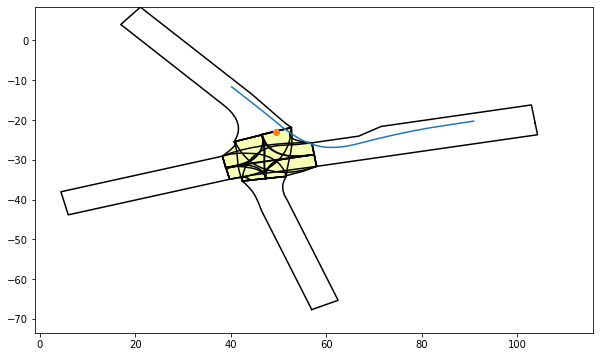

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_map(scenario_map, ax=ax)
path = agent.trajectory.path
ax.plot(path[:, 0], path[:, 1])
ax.plot(*scenario_config.goals[0], 'o')

In [21]:
scenario_name = 'heckstrasse'
scenario_map = Map.parse_from_opendrive(f"scenarios/maps/{scenario_name}.xodr")

scenario_config = ScenarioConfig.load(f"scenarios/configs/{scenario_name}.json")
scenario = InDScenario(scenario_config)

In [22]:
goal_detector = GoalDetector(scenario.config.goals)

In [23]:
episode_idx = 0
episode = scenario.load_episode(episode_idx)

In [24]:
agent = episode.agents[0]

In [25]:
agent_goals, goal_frame_idxes = goal_detector.detect_goals(agent.trajectory)

In [26]:
agent_goals

[2]

In [27]:
trajectory = agent.trajectory

In [28]:
feature_extractor = FeatureExtractor(scenario_map)

In [29]:
for idx in range(0, len(agent.trajectory.path)):
    typed_goals = feature_extractor.get_typed_goals(agent.trajectory.slice(0, idx+1), scenario.config.goals)
    print(idx, [g is not None for g in typed_goals])

0 [False, True, True]
1 [False, True, True]
2 [False, True, True]
3 [False, True, True]
4 [False, True, True]
5 [False, True, True]
6 [False, True, True]
7 [False, True, True]
8 [False, True, True]
9 [False, True, True]
10 [False, True, True]
11 [False, True, True]
12 [False, True, True]
13 [False, True, True]
14 [False, True, True]
15 [False, True, True]
16 [False, True, True]
17 [False, True, True]
18 [False, True, True]
19 [False, True, True]
20 [False, True, True]
21 [False, True, True]
22 [False, True, True]
23 [False, True, True]
24 [False, True, True]
25 [False, True, True]
26 [False, True, True]
27 [False, True, True]
28 [False, True, True]
29 [False, True, True]
30 [False, True, True]
31 [False, True, True]
32 [False, True, True]
33 [False, True, True]
34 [False, True, True]
35 [False, True, True]
36 [False, True, True]
37 [False, True, True]
38 [False, True, True]
39 [False, True, True]
40 [False, True, True]
41 [False, True, True]
42 [False, True, True]
43 [False, True, True

In [30]:
typed_goals

[None,
 None,
 TypedGoal(goal_type='turn-left', goal=PointGoal(center=(60.28649753795391, -18.63995200476946), r=1.5545799999999999), lane_path=[Lane(id=-1) on Road(id=5)])]

In [31]:
agent.trajectory.path[68]

array([ 33.48256, -20.12529])

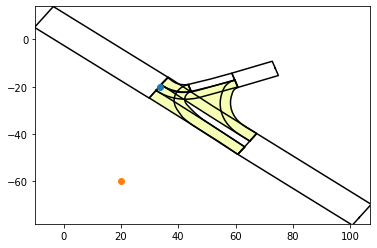

In [32]:
ax = plot_map(scenario_map)
ax.plot(*agent.trajectory.path[68], 'o')
ax.plot([20],[-60], 'o')

In [33]:
scenario_map.lanes_at(agent.trajectory.path[0], max_distance=3)

[Lane(id=1) on Road(id=1), Lane(id=2) on Road(id=1), Lane(id=-1) on Road(id=1)]

In [34]:
lanes = scenario_map.lanes_within_angle(agent.trajectory.path[0],
                                        agent.trajectory.heading[0],
                                threshold=np.pi/4, max_distance=3)
print(lanes)

[Lane(id=1) on Road(id=1), Lane(id=2) on Road(id=1)]


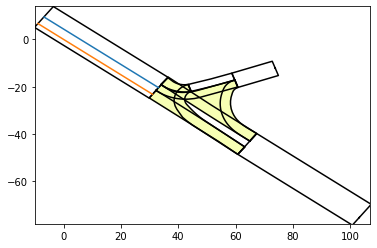

In [35]:
ax = plot_map(scenario_map)
for lane in lanes:
    ax.plot(*list(zip(*[x for x in lane.midline.coords])))

In [36]:
goal_point = np.array((62.2, -47.3))
idx = 70
best_lane = scenario_map.best_lane_at(agent.trajectory.path[idx],
                                  agent.trajectory.heading[idx],
                                  max_distance=3, goal_point=goal_point)
print(best_lane)

Lane(id=-1) on Road(id=5)


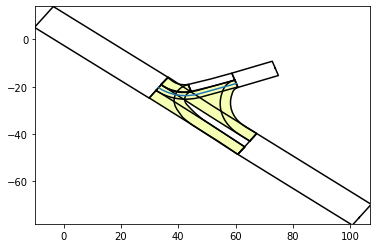

In [37]:
ax = plot_map(scenario_map)
ax.plot(*list(zip(*[x for x in best_lane.midline.coords])))

In [38]:
data = pd.read_csv('data/heckstrasse_e0.csv')

In [39]:
goals_10 = data.loc[data.fraction_observed==1.0].value_counts('agent_id')

In [40]:
goals_09 = data.loc[data.fraction_observed==0.9].value_counts('agent_id')

In [41]:
(goals_10 > goals_09).sum()

0

In [42]:
predictions = pd.read_csv('predictions/heckstrasse_prior_baseline_test.csv')
predictions

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,False
1,0,0,8,2,turn-left,0.1,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,False
2,0,0,16,2,turn-left,0.2,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,False
3,0,0,24,2,turn-left,0.3,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,False
4,0,0,32,2,turn-left,0.4,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0,409,25451,1,straight-on,0.6,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
4000,0,409,25457,1,straight-on,0.7,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
4001,0,409,25463,1,straight-on,0.8,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
4002,0,409,25469,1,straight-on,0.9,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True


In [43]:
predictions.loc[predictions.fraction_observed==1.0].model_correct.mean()

0.8434065934065934

In [44]:
predictions.loc[predictions.fraction_observed==0.9].model_correct.mean()

0.8434065934065934

In [45]:
idx = predictions.loc[predictions.fraction_observed==0.9].set_index('agent_id').model_correct \
                      != predictions.loc[predictions.fraction_observed==1.0].set_index('agent_id').model_correct

In [46]:
idx.loc[idx]

Series([], Name: model_correct, dtype: bool)

In [47]:
predictions.loc[predictions.agent_id==15]

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
77,0,15,1220,1,straight-on,0.0,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
78,0,15,1226,1,straight-on,0.1,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
79,0,15,1232,1,straight-on,0.2,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
80,0,15,1238,1,straight-on,0.3,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
81,0,15,1244,1,straight-on,0.4,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
82,0,15,1250,1,straight-on,0.5,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
83,0,15,1256,1,straight-on,0.6,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
84,0,15,1262,1,straight-on,0.7,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
85,0,15,1268,1,straight-on,0.8,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True
86,0,15,1274,1,straight-on,0.9,1,straight-on,0.828704,0.828704,0.171296,0.457936,0.660662,True


Problem: Wrong goal type inferred at the last minute - why? G1 assigned goal type turn-left

In [48]:
data.loc[data.agent_id==15]

,path_to_goal_length,in_correct_lane,speed,acceleration,angle_in_lane,vehicle_in_front_dist,vehicle_in_front_speed,oncoming_vehicle_dist,oncoming_vehicle_speed,goal_type,agent_id,possible_goal,true_goal,true_goal_type,frame_id,initial_frame_id,fraction_observed
154,64.099879,True,12.804533,1.925307,0.014660,100.0,20.0,100.0,20.0,straight-on,15,1,1,straight-on,1220,1220,0.0
155,53.730436,False,12.804533,1.925307,0.014660,100.0,20.0,100.0,20.0,turn-left,15,2,1,straight-on,1220,1220,0.0
156,60.919800,True,13.362610,1.569883,0.012451,100.0,20.0,100.0,20.0,straight-on,15,1,1,straight-on,1226,1220,0.1
157,50.550357,False,13.362610,1.569883,0.012451,100.0,20.0,100.0,20.0,turn-left,15,2,1,straight-on,1226,1220,0.1
158,57.630405,True,13.672999,0.867910,0.008673,100.0,20.0,100.0,20.0,straight-on,15,1,1,straight-on,1232,1220,0.2
159,47.260962,False,13.672999,0.867910,0.008673,100.0,20.0,100.0,20.0,turn-left,15,2,1,straight-on,1232,1220,0.2
160,54.325298,True,13.775588,0.343347,0.006663,100.0,20.0,100.0,20.0,straight-on,15,1,1,straight-on,1238,1220,0.3
161,43.955855,False,13.775588,0.343347,0.006663,100.0,20.0,100.0,20.0,turn-left,15,2,1,straight-on,1238,1220,0.3
162,51.022033,True,13.773022,0.172584,0.002413,100.0,20.0,100.0,20.0,straight-on,15,1,1,straight-on,1244,1220,0.4
163,40.652590,False,13.773022,0.172584,0.002413,100.0,20.0,100.0,20.0,turn-left,15,2,1,straight-on,1244,1220,0.4


In [49]:
# lane id -1 on road 6, heckstrasse - detected as goal G1 - this must be junction NE to SE
# take into account trajectory history when detecting lane? Is this done for lanelet2 GRIT? e.g. previous lanelet

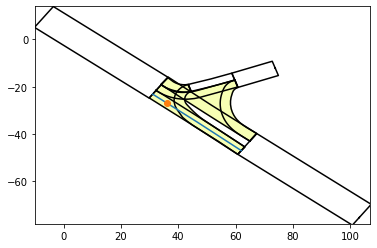

In [50]:
ax = plot_map(scenario_map)
lane = scenario_map.get_lane(7, -1)
ax.plot(*list(zip(*[x for x in lane.midline.coords])))
ax.plot([36.0], [-27.0], 'o')

In [51]:
heading = -0.6367160078810041
speed = 15.915689301070186

In [52]:
scenario_name = 'round'
scenario_map = Map.parse_from_opendrive(f"scenarios/maps/{scenario_name}.xodr")

scenario_config = ScenarioConfig.load(f"scenarios/configs/{scenario_name}.json")
scenario = InDScenario(scenario_config)

In [53]:
episode_idx = 0
episode = scenario.load_episode(episode_idx)


In [54]:
print(len(agent_goals))
for g in agent_goals:
    print(g)

1
2


In [66]:
pwd

'/home/cillian/phd/projects/GRIT'

In [67]:
odr_results = pd.read_csv('predictions/round_trained_trees_test.csv')
odr_results.shape

(5775, 14)

In [68]:
lanelet_results = pd.read_csv('../GRIT-lanelet/predictions/round_trained_trees_test.csv')
lanelet_results.shape

(5522, 14)

In [69]:
odr_results[['episode', 'agent_id', 'fraction_observed']]

,episode,agent_id,fraction_observed
0,4,12,0.0
1,4,12,0.1
2,4,12,0.2
3,4,12,0.3
4,4,12,0.4
...,...,...,...
5770,21,459,0.6
5771,21,459,0.7
5772,21,459,0.8
5773,21,459,0.9


In [70]:
# isin with multiple columns?

In [83]:
episode = 4
fraction_observerd = 0.8
odr_samples = odr_results.loc[(odr_results.episode == episode) 
                & (odr_results.fraction_observed == fraction_observerd)].set_index('agent_id')
lanelet_samples = lanelet_results.loc[(lanelet_results.episode == episode) 
                & (lanelet_results.fraction_observed == fraction_observerd)].set_index('agent_id')

In [85]:
lanelet_samples

,episode,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
agent_id,,,,,,,,,,,,,
12,4,288,2,turn-left,0.8,2,turn-left,0.994408,0.994408,0.000773,0.039825,0.028728,True
13,4,16,0,turn-right,0.8,0,turn-right,0.793183,0.793183,0.030596,0.690348,0.497981,True
21,4,344,2,turn-left,0.8,2,turn-left,0.994408,0.994408,0.000773,0.039825,0.028728,True
24,4,479,1,straight-on,0.8,1,straight-on,0.993858,0.993858,0.000345,0.042019,0.030310,True
28,4,677,2,straight-on,0.8,2,straight-on,0.984234,0.984234,0.000195,0.083267,0.060065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,4,30781,0,straight-on,0.8,0,straight-on,0.789747,0.789747,0.000399,0.541799,0.390825,True
751,4,30874,0,straight-on,0.8,0,straight-on,0.940744,0.940744,0.001863,0.242340,0.174812,True
755,4,30903,0,turn-left,0.8,0,turn-left,0.997700,0.997700,0.000598,0.018733,0.013513,True


In [86]:
odr_samples

,episode,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
agent_id,,,,,,,,,,,,,
12,4,288,2,turn-right,0.8,2,exit-roundabout,0.761193,0.761193,0.111769,0.714740,0.650585,True
13,4,24,0,turn-right,0.8,0,exit-roundabout,0.574105,0.574105,0.001302,0.690964,0.628942,True
21,4,344,2,turn-right,0.8,2,exit-roundabout,0.853631,0.853631,0.021027,0.476596,0.433816,True
24,4,479,1,turn-right,0.8,1,exit-roundabout,0.558836,0.558836,0.162251,0.976389,0.888748,True
28,4,669,2,turn-right,0.8,2,exit-roundabout,0.853631,0.853631,0.021027,0.476596,0.433816,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,4,30911,0,turn-right,0.8,0,exit-roundabout,0.555068,0.555068,0.056122,0.855689,0.778881,True
757,4,31058,0,turn-right,0.8,0,exit-roundabout,0.540254,0.540254,0.081313,0.904423,0.823241,True
758,4,30830,1,turn-right,0.8,1,exit-roundabout,0.596831,0.596831,0.105293,0.905804,0.824498,True


In [91]:
odr_samples = odr_samples.join(lanelet_samples.model_correct, rsuffix='_ll')

In [92]:
odr_samples.loc[odr_samples.model_correct != odr_samples.model_correct_ll]

,episode,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct,model_correct_ll
agent_id,,,,,,,,,,,,,,
47,4,1883,0,turn-right,0.8,2,exit-roundabout,0.383175,0.383175,0.292975,1.092374,0.994322,False,True
61,4,2255,1,turn-right,0.8,2,exit-roundabout,0.499222,0.499222,0.002704,0.709962,0.646235,False,True
64,4,2656,1,turn-right,0.8,1,exit-roundabout,0.773380,0.773380,0.002078,0.546979,0.497882,True,NaN
80,4,3431,1,turn-right,0.8,2,exit-roundabout,0.437183,0.437183,0.126639,0.985314,0.896872,False,True
103,4,5320,1,turn-right,0.8,2,exit-roundabout,0.511035,0.511035,0.007515,0.731739,0.666057,False,True
107,4,5432,1,turn-right,0.8,2,exit-roundabout,0.784006,0.784006,0.003320,0.538946,0.490570,False,True
108,4,5687,2,turn-right,0.8,0,exit-roundabout,0.556218,0.556218,0.002415,0.701814,0.638818,False,True
111,4,5540,1,turn-right,0.8,2,exit-roundabout,0.784006,0.784006,0.003320,0.538946,0.490570,False,True
120,4,5821,1,turn-right,0.8,2,exit-roundabout,0.560490,0.560490,0.002373,0.700570,0.637686,False,True
